In [18]:
# Importing the packages
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [19]:
df = pd.read_csv('International Airline Passengers.csv')


In [20]:
df.head(3)

,No_passengers_thousands
0,112
1,118
2,132


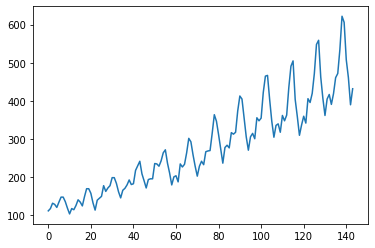

In [21]:
plt.plot(df)
plt.show()

In [22]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [23]:
dataset = df.values
dataset = dataset.astype('float32')

In [24]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [25]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


In [27]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [28]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)


In [37]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [41]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=32, verbose=2)

Epoch 1/100
 - 1s - loss: 0.0630
Epoch 2/100
 - 0s - loss: 0.0607
Epoch 3/100
 - 0s - loss: 0.0586
Epoch 4/100
 - 0s - loss: 0.0565
Epoch 5/100
 - 0s - loss: 0.0544
Epoch 6/100
 - 0s - loss: 0.0524
Epoch 7/100
 - 0s - loss: 0.0505
Epoch 8/100
 - 0s - loss: 0.0487
Epoch 9/100
 - 0s - loss: 0.0468
Epoch 10/100
 - 0s - loss: 0.0450
Epoch 11/100
 - 0s - loss: 0.0433
Epoch 12/100
 - 0s - loss: 0.0418
Epoch 13/100
 - 0s - loss: 0.0401
Epoch 14/100
 - 0s - loss: 0.0386
Epoch 15/100
 - 0s - loss: 0.0371
Epoch 16/100
 - 0s - loss: 0.0357
Epoch 17/100
 - 0s - loss: 0.0344
Epoch 18/100
 - 0s - loss: 0.0330
Epoch 19/100
 - 0s - loss: 0.0319
Epoch 20/100
 - 0s - loss: 0.0306
Epoch 21/100
 - 0s - loss: 0.0294
Epoch 22/100
 - 0s - loss: 0.0284
Epoch 23/100
 - 0s - loss: 0.0274
Epoch 24/100
 - 0s - loss: 0.0265
Epoch 25/100
 - 0s - loss: 0.0255
Epoch 26/100
 - 0s - loss: 0.0246
Epoch 27/100
 - 0s - loss: 0.0238
Epoch 28/100
 - 0s - loss: 0.0230
Epoch 29/100
 - 0s - loss: 0.0223
Epoch 30/100
 - 0s - lo

In [42]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 52.71 RMSE
Test Score: 152.65 RMSE


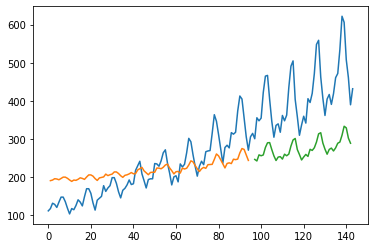

In [44]:

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

